# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('Alpaca.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
BTC = 1.2
ETH = 5.3

In [4]:
# Crypto API URLs
BTC_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
ETH_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
data_btc = requests.get(BTC_url)
data_btc
my_btc_data = data_btc.content
my_btc_data
new_data_btc = data_btc.json()

import json
print(json.dumps(new_data_btc, indent = 5))
# Fetch current ETH price
# YOUR CODE HERE!]
my_eth = requests.get(ETH_url)
#my_eth
my_eth_content = my_eth.content
data_eth = my_eth.json()
print(json.dumps(data_eth, indent=5))
# Compute current value of my crpto
# YOUR CODE HERE!


{
     "data": {
          "1": {
               "id": 1,
               "name": "Bitcoin",
               "symbol": "BTC",
               "website_slug": "bitcoin",
               "rank": 1,
               "circulating_supply": 18613356,
               "total_supply": 18613356,
               "max_supply": 21000000,
               "quotes": {
                    "USD": {
                         "price": 33010.0,
                         "volume_24h": 56352444314,
                         "market_cap": 618258904947,
                         "percentage_change_1h": -2.95441428814317,
                         "percentage_change_24h": 5.49041158372331,
                         "percentage_change_7d": 6.7805634797255,
                         "percent_change_1h": -2.95441428814317,
                         "percent_change_24h": 5.49041158372331,
                         "percent_change_7d": 6.7805634797255
                    },
                    "CAD": {
                         "price

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
#btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
#my_btc_value = my_btc * btc_value
#eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

btc_value = new_data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = BTC * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = ETH * eth_value


#my_eth_value = ETH * eth_value
# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39612.00
The current value of your 5.3 ETH is $6927.95


In [7]:
# Current amount of shares
# YOUR CODE HERE!
#Assume the following amount of shares in stocks and bonds: 50 SPY (stocks) and 200 AGG (bonds).
my_SPY = 50
my_AGG = 200

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APACA_API_SECRET_KEY')
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")
# YOUR CODE HERE!

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
Today = pd.Timestamp("01-28-2021",  tz = "America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset( tickers, timeframe, start=Today, end=Today,).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-28 00:00:00-05:00  117.48  117.49  117.29  117.43  4440895  376.36   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-28 00:00:00-05:00  381.93  375.89  377.6  75229306

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.43
Current SPY closing price: $377.6


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_AGG * agg_close_price
my_spy_value = my_SPY *spy_close_price
# Print current value of share
print(f"The current value of your {my_SPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_AGG} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18880.00
The current value of your 200 AGG shares is $23486.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

data = {'amount': [total_crypto, total_shares_value]}
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,46539.948
shares,42366.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

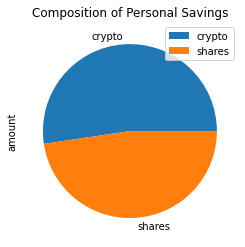

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value
# Validate saving health
# YOUR CODE HERE!
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987341,1.003707,1.006628,0.993262,1.002488,1.008067,1.002164,1.002702,0.992761,1.012769,...,1.006241,0.991789,1.006646,1.001567,0.997280,1.004199,1.005883,1.001559,1.000535,0.986684
2,0.990766,0.992381,1.004305,0.979283,0.999964,1.005762,1.007088,1.006021,0.990215,1.016758,...,0.999041,0.998265,1.026395,1.002949,0.998051,1.014429,0.998922,0.999234,0.999124,0.995866
3,0.984473,0.979647,1.000338,0.988549,1.004004,1.008811,0.999765,1.004278,0.989033,1.027028,...,0.995566,0.997196,1.027130,0.998356,0.990089,1.010450,0.988502,0.988733,0.997786,1.002750
4,0.984142,0.972535,1.005221,0.990277,1.016756,1.011678,1.003683,1.001895,0.996319,1.019957,...,0.992050,0.997033,1.020264,0.989191,0.988521,1.009139,0.977384,0.992452,0.999198,1.019951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.357358,9.150410,8.129856,20.887859,3.704871,2.707026,2.815761,6.553000,6.372436,12.333565,...,4.080116,5.689440,11.336096,26.317502,4.255140,9.764229,35.374364,6.712573,3.432289,6.631518
7557,4.349043,9.186434,8.057570,20.953094,3.677403,2.730329,2.826610,6.623191,6.336019,12.464305,...,4.138673,5.700382,11.315016,26.501221,4.275864,9.801752,35.204293,6.679985,3.404495,6.643368
7558,4.370785,9.181619,8.007432,21.045197,3.662495,2.760863,2.848870,6.594440,6.379631,12.402848,...,4.156114,5.608404,11.360673,26.172264,4.289506,9.821591,35.426810,6.584103,3.411747,6.653694
7559,4.370241,9.113521,7.964696,20.965882,3.674493,2.749865,2.855818,6.683573,6.515834,12.392753,...,4.155422,5.604756,11.375273,25.630814,4.296759,9.883551,35.282214,6.625662,3.406696,6.580175


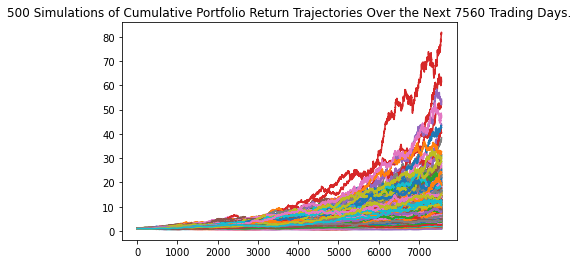

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
monte_carlo_plot = MC_even_dist.plot_simulation()

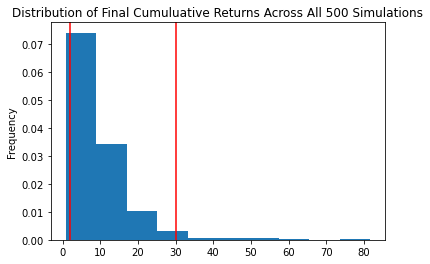

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean              9.849282
std               8.312477
min               0.837365
25%               4.911984
50%               7.798027
75%              11.850068
max              81.625558
95% CI Lower      1.983481
95% CI Upper     29.991905
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39669.61 and $599838.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $59504.42 and $899757.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995529,1.009512,0.999609,0.996745,0.988798,1.014908,1.002015,1.004483,1.003996,0.994250,...,1.001997,1.007044,1.021487,1.003583,0.998983,0.998872,1.007860,0.983926,0.997788,0.990219
2,0.995992,1.014795,0.988747,1.002921,0.999555,1.016589,1.002222,0.991369,1.007213,0.983377,...,1.016756,0.997651,1.018174,1.005613,1.003835,1.006499,1.005979,0.986942,1.003646,0.987045
3,0.991481,1.031092,0.984374,1.012878,1.005993,1.016492,0.998992,0.985799,1.011849,0.974163,...,1.014840,0.998557,1.019862,1.002702,1.006773,1.006944,1.017863,0.991480,0.998200,0.993557
4,1.011500,1.024074,0.987592,0.998040,1.010381,1.007207,1.004643,0.993353,1.012988,0.972282,...,1.010136,1.001334,1.012623,0.995775,1.008291,1.013490,1.016653,0.996777,0.993606,0.985986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.422552,1.251305,1.890822,1.711123,1.457439,1.855770,1.314817,1.798579,1.740208,1.520682,...,1.200672,1.164073,1.984533,1.476205,1.793402,1.520942,2.444674,0.749437,2.231064,1.542239
1257,1.410273,1.261560,1.891650,1.708982,1.471410,1.851378,1.336700,1.806574,1.727030,1.517098,...,1.187159,1.159634,2.005893,1.478676,1.797247,1.525683,2.459818,0.758558,2.230853,1.516149
1258,1.416895,1.252946,1.891593,1.716121,1.476291,1.863456,1.339480,1.789022,1.733021,1.511519,...,1.214052,1.165963,1.994902,1.501922,1.817601,1.541223,2.457520,0.765435,2.251236,1.515312
1259,1.417763,1.249745,1.905055,1.717185,1.474602,1.885670,1.331142,1.810459,1.729969,1.508014,...,1.207164,1.174135,2.009221,1.497825,1.818925,1.547881,2.483812,0.766073,2.232209,1.516545


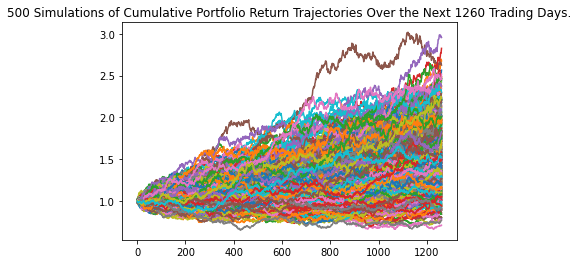

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()

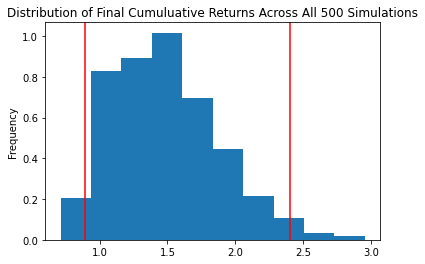

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)

count           500.000000
mean              1.490545
std               0.391865
min               0.711854
25%               1.186817
50%               1.457100
75%               1.742680
max               2.955538
95% CI Lower      0.894096
95% CI Upper      2.401560
Name: 1260, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $53645.78 and $144093.62


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990539,0.987632,0.994028,0.994153,1.004134,1.003486,0.993744,1.002587,0.987273,1.019835,...,1.006835,0.999063,1.003908,1.011162,1.015414,1.000617,0.990789,1.008642,0.996334,1.005314
2,0.992588,0.972647,0.999738,1.007123,0.997883,1.004039,1.011336,1.007085,0.987315,1.023468,...,0.993518,1.005840,1.003495,1.021699,1.010225,0.999661,0.991515,1.003079,1.003680,1.001715
3,0.989282,0.954609,1.008187,1.016333,1.008728,1.009389,0.995294,0.995394,0.982979,1.019076,...,0.997509,1.020340,1.000105,1.028588,1.015041,0.995212,0.996231,0.998432,1.006637,1.011747
4,0.995095,0.954806,1.001645,1.006502,1.010591,1.013134,0.999364,1.005858,0.991687,1.026830,...,0.998746,1.017079,1.008206,1.024068,1.023140,1.008187,0.999821,1.011568,1.000764,1.011296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.276315,1.533782,2.264293,2.238658,1.269320,4.391919,3.104782,2.175418,1.799110,1.174846,...,3.989959,4.972236,2.080217,3.061594,2.636883,2.851050,1.316371,1.894558,3.141214,0.978613
2517,1.284489,1.550092,2.264224,2.237829,1.262449,4.434452,3.064862,2.146667,1.774554,1.169472,...,3.953752,4.940046,2.046218,3.058905,2.614579,2.841102,1.318640,1.903982,3.168114,0.976436
2518,1.296395,1.553710,2.280381,2.249461,1.258401,4.461485,3.082072,2.144088,1.767480,1.162662,...,3.954024,4.970981,2.048386,3.033035,2.623986,2.854352,1.315669,1.901948,3.152214,0.978131
2519,1.286344,1.562378,2.262237,2.251540,1.240439,4.464608,3.088804,2.151475,1.756690,1.182179,...,3.969222,4.952408,2.047407,3.052500,2.633734,2.882491,1.325337,1.916076,3.160840,0.987211


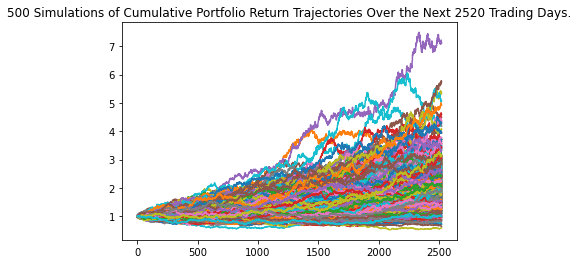

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()

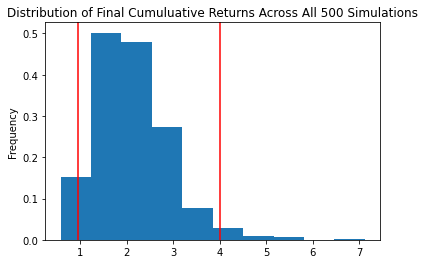

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count           500.000000
mean              2.136770
std               0.807465
min               0.582115
25%               1.562011
50%               2.032843
75%               2.580527
max               7.119549
95% CI Lower      0.962215
95% CI Upper      4.017504
Name: 2520, dtype: float64


In [46]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_five[8]*60000,2)
ci_upper_ten = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $53645.78 and $144093.62
